In [12]:
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import yfinance as yf

# ------------------------------------------------------------------
# 1) Get today’s S&P 500 constituents straight from Wikipedia
# ------------------------------------------------------------------
wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
table = pd.read_html(wiki_url, header=0)[0] 
tickers = (table["Symbol"]
           .str.replace(".", "-", regex=False)
           .tolist())

# ------------------------------------------------------------------
# 2) Pull month-end prices in one bulk request
# ------------------------------------------------------------------
start, end = "2015-01-01", "2025-05-31"
data = yf.download(
    tickers,
    start=start,
    end=end,
    interval="1mo",         # monthly bars
    group_by="ticker",      # ⇢ multi-index columns
    threads=True,
    progress=False,
    auto_adjust=True        # already split/dividend-adjusted
)

data

Ticker           MNST                                                    GDDY  \
Price            Open       High        Low      Close     Volume        Open   
Date                                                                            
2015-01-01  18.233334  20.378332  17.795000  19.491667  142964400         NaN   
2015-02-01  19.465000  23.983334  19.116667  23.520000  123728400         NaN   
2015-03-01  23.696667  23.831667  22.320000  23.066668  141901800   20.000000   
2015-04-01  23.120001  24.115000  22.333332  22.851667  127381200   26.150000   
2015-05-01  22.873333  24.058332  21.061666  21.213333  249696000   25.190001   
...               ...        ...        ...        ...        ...         ...   
2025-01-01  52.959999  53.310001  47.860001  48.709999  129813300  199.009995   
2025-02-01  48.389999  56.400002  45.700001  54.650002  129595400  207.699997   
2025-03-01  54.430000  59.000000  53.900002  58.520000  123057600  180.660004   
2025-04-01  58.500000  60.340000  54.730000  60.119999  132438400  179.850006   
2025-05-01  59.860001  64.449997  58.619999  63.950001  119149900  190.860001   

Ticker                                                      ...        MAS  \
Price             High         Low       Close      Volume  ...       Open   
Date                                                        ...              
2015-01-01         NaN         NaN         NaN         NaN  ...  19.103902   
2015-02-01         NaN         NaN         NaN         NaN  ...  18.924983   
2015-03-01   20.000000   20.000000   20.000000         0.0  ...  19.778345   
2015-04-01   27.270000   24.500000   25.070000  39826300.0  ...  20.246556   
2015-05-01   27.730000   24.150000   26.930000  11762200.0  ...  20.066043   
...                ...         ...         ...         ...  ...        ...   
2025-01-01  216.000000  189.449997  212.649994  22271400.0  ...  72.343762   
2025-02-01  214.759995  168.869995  179.500000  32252100.0  ...  76.912321   
2025-03-01  185.315002  170.199997  180.139999  34651600.0  ...  75.255952   
2025-04-01  188.800003  155.500000  188.330002  36368400.0  ...  69.245821   
2025-05-01  193.550003  171.011002  182.149994  28451100.0  ...  60.270434   

Ticker                                                       CCL             \
Price            High        Low      Close    Volume       Open       High   
Date                                                                          
2015-01-01  19.517733  17.478680  18.690073  92180846  39.171883  40.477327   
2015-02-01  20.692121  18.585149  19.778343  81979246  37.388629  38.165070   
2015-03-01  20.458013  19.249716  20.163490  76987861  37.786020  41.261684   
2015-04-01  20.548632  19.234606  20.004896  97111799  41.029966  42.231427   
2015-05-01  21.164826  19.565908  20.513134  85485421  37.657296  41.673616   
...               ...        ...        ...       ...        ...        ...   
2025-01-01  81.441238  70.381558  78.567307  26489000  25.129999  28.719999   
2025-02-01  78.448391  73.324861  74.504166  30531700  26.520000  27.820000   
2025-03-01  75.982345  67.504479  69.196075  46275600  23.820000  24.469999   
2025-04-01  70.877717  56.270316  60.310238  62772100  19.600000  20.049999   
2025-05-01  69.574189  59.663450  62.111282  47387400  18.680000  23.670000   

Ticker                                       
Price             Low      Close     Volume  
Date                                         
2015-01-01  37.397162  37.508080   87104000  
2015-02-01  36.270894  37.533680   90248600  
2015-03-01  37.537148  41.055717  110081300  
2015-04-01  37.494229  37.734524   74845600  
2015-05-01  36.987907  39.759857   60516900  
...               ...        ...        ...  
2025-01-01  23.270000  27.670000  438349700  
2025-02-01  22.820000  23.930000  357076200  
2025-03-01  18.160000  19.530001  612776800  
2025-04-01  15.070000  18.340000  598649900  
2025-05-01  18.510000  23.219999  469315200  

[125 rows x 2510 col

In [3]:
# keep only the raw Close column
df = data.xs("Close", level=1, axis=1)      # <- level=1 is the price field

df.head()

Ticker,MNST,GDDY,HLT,AMT,GPN,BKR,JKHY,TMO,ETR,DD,...,CTRA,ADBE,IEX,XYL,FRT,AMP,CSGP,MSI,MAS,CCL
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,19.491667,NaN,50.451180,75.806702,41.718449,31.236776,54.018536,121.306175,36.232174,50.157303,...,19.548433,70.129997,63.136780,29.851244,98.258415,99.621788,18.451000,52.533962,18.690073,37.508080
2015-02-01,23.520000,NaN,54.919319,77.519119,43.892532,33.671509,57.653816,125.946854,32.919884,54.688805,...,21.407660,79.099998,67.678268,31.251892,97.069229,106.550842,19.916000,57.188862,19.778343,37.533680
2015-03-01,23.066668,20.00,57.541924,73.617378,43.816223,34.247871,61.750320,130.151520,32.083534,53.289371,...,21.798906,73.940002,66.425629,30.778494,100.609459,104.787086,19.783001,56.119839,20.163490,41.055717
2015-04-01,22.851667,25.07,56.259754,73.914490,47.926384,36.977089,58.763985,121.904465,31.955185,57.155830,...,24.965765,76.059998,65.707306,32.536247,91.912155,100.334175,20.443001,50.557983,20.004896,37.734524
2015-05-01,21.213333,26.93,56.259754,72.869888,49.885887,34.816578,57.500515,125.735809,31.661224,58.354977,...,25.069120,79.089996,67.961517,32.140743,92.462212,100.308731,20.891001,49.923382,20.513134,39.759857


In [4]:
na_counts = df.isna().sum()

na_counts = na_counts[na_counts > 0]

num_tickers_with_missing = len(na_counts)  

num_tickers_with_missing

34

In [5]:
df = df.dropna(axis=1)

df.head()

Ticker,MNST,HLT,AMT,GPN,BKR,JKHY,TMO,ETR,DD,J,...,CTRA,ADBE,IEX,XYL,FRT,AMP,CSGP,MSI,MAS,CCL
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,19.491667,50.451180,75.806702,41.718449,31.236776,54.018536,121.306175,36.232174,50.157303,29.993166,...,19.548433,70.129997,63.136780,29.851244,98.258415,99.621788,18.451000,52.533962,18.690073,37.508080
2015-02-01,23.520000,54.919319,77.519119,43.892532,33.671509,57.653816,125.946854,32.919884,54.688805,34.905426,...,21.407660,79.099998,67.678268,31.251892,97.069229,106.550842,19.916000,57.188862,19.778343,37.533680
2015-03-01,23.066668,57.541924,73.617378,43.816223,34.247871,61.750320,130.151520,32.083534,53.289371,35.550949,...,21.798906,73.940002,66.425629,30.778494,100.609459,104.787086,19.783001,56.119839,20.163490,41.055717
2015-04-01,22.851667,56.259754,73.914490,47.926384,36.977089,58.763985,121.904465,31.955185,57.155830,33.740349,...,24.965765,76.059998,65.707306,32.536247,91.912155,100.334175,20.443001,50.557983,20.004896,37.734524
2015-05-01,21.213333,56.259754,72.869888,49.885887,34.816578,57.500515,125.735809,31.661224,58.354977,34.055237,...,25.069120,79.089996,67.961517,32.140743,92.462212,100.308731,20.891001,49.923382,20.513134,39.759857


In [6]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# z-normalise each ticker (k-Shape assumes mean-0/var-1)
scaler  = TimeSeriesScalerMeanVariance()
X       = scaler.fit_transform(df.values.T)   # shape: (n_tickers, n_months)


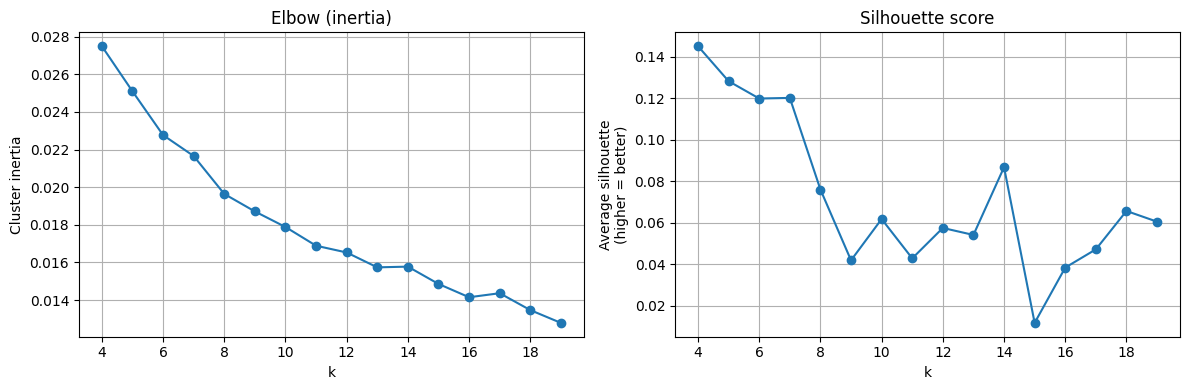

In [7]:
# ------------------------------------------------------------
# 1. Re-use X from the elbow step
#     (X.shape == (n_tickers, n_months); already z-normalised)
# ------------------------------------------------------------
from tslearn.clustering import KShape
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_values     = range(4, 20)
inertias     = []      # re-collect, handy to keep them together
silhouettes  = []

for k in k_values:
    ks = KShape(n_clusters=k, random_state=42, n_init=10).fit(X)
    inertias.append(ks.inertia_)
    
    # sklearn's silhouette_score needs 2-D array (n_samples × n_features)
    labels = ks.labels_
    flatX  = X.reshape(X.shape[0], -1)     # flatten the time axis
    sil    = silhouette_score(flatX, labels, metric="euclidean")
    silhouettes.append(sil)

# ------------------------------------------------------------
# 2. Plot inertia and silhouette side-by-side
# ------------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Arm / elbow
ax[0].plot(k_values, inertias, marker='o')
ax[0].set_title("Elbow (inertia)")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Cluster inertia")

# Silhouette
ax[1].plot(k_values, silhouettes, marker='o')
ax[1].set_title("Silhouette score")
ax[1].set_xlabel("k")
ax[1].set_ylabel("Average silhouette\n(higher = better)")

for a in ax: a.grid(True)
plt.tight_layout()
plt.show()


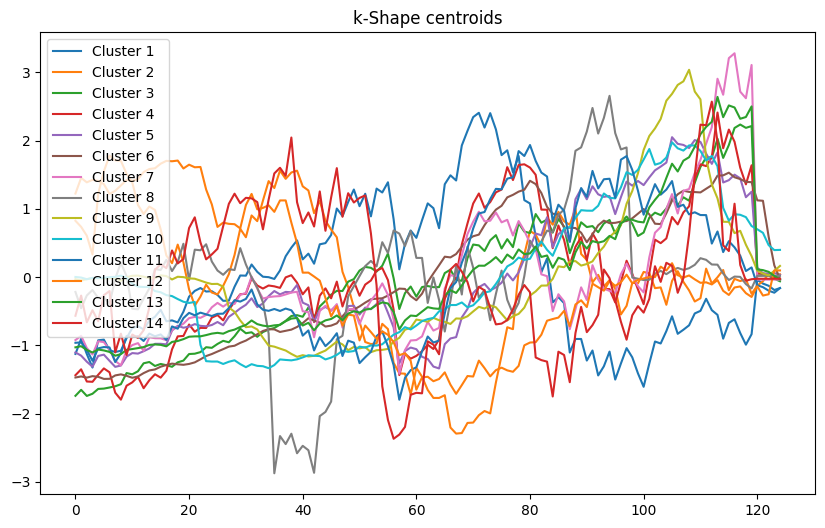

In [8]:
best_k = 14            # example
ks = KShape(n_clusters=best_k, random_state=42, n_init=10).fit(X)

plt.figure(figsize=(10, 6))
for idx, centroid in enumerate(ks.cluster_centers_):
    plt.plot(centroid.ravel(), label=f"Cluster {idx + 1}")
plt.legend(); plt.title("k-Shape centroids");


In [9]:
# 1.  Build a tidy table ticker → cluster
cluster_map = pd.Series(ks.labels_, index=df.columns, name="cluster")

# 2.  Quick peek
print(cluster_map.head())

Ticker
MNST     5
HLT     12
AMT      9
GPN      9
BKR      8
Name: cluster, dtype: int64


In [10]:
for c in sorted(cluster_map.unique()):
    members = cluster_map[cluster_map == c].index.tolist()
    print(f"\nCluster {c + 1}  (n = {len(members)})")
    print(", ".join(members))



Cluster 1  (n = 10)
DIS, DOC, INCY, IFF, HAS, FIS, D, INTC, BAX, SWK

Cluster 2  (n = 7)
MHK, IVZ, OXY, MMM, BEN, WDC, BXP

Cluster 3  (n = 46)
ETR, LDOS, ICE, GL, CSCO, HII, VRSK, SO, NOC, PNW, V, CNP, ED, ADP, CME, AEE, LMT, CPAY, ECL, ATO, EVRG, EXC, PAYX, WM, SYK, LYV, AMGN, BR, FE, WTW, DTE, CINF, SRE, AEP, NI, DUK, AIZ, DRI, WEC, MA, AON, KO, YUM, ROST, CMS, PEG

Cluster 4  (n = 23)
SCHW, RF, HBAN, EMN, FDX, AVB, GM, EXPE, PRU, KEY, BAC, FITB, PNC, MTB, CFG, NTRS, EQR, UDR, GLW, ESS, TFC, CTSH, USB

Cluster 5  (n = 23)
VLO, OMC, PFG, MPC, XOM, EOG, COP, ULTA, TXT, HES, HST, NUE, EG, STLD, STZ, CI, GD, LYB, GPC, PSX, CVX, ON, FANG

Cluster 6  (n = 126)
MNST, JKHY, TMO, J, JBHT, TEL, PLD, PEP, NEE, POOL, GOOG, AMD, HPQ, PODD, WST, BDX, MSFT, PPG, EFX, ALLE, ROL, NSC, UNP, AMZN, CRM, LRCX, WAT, QCOM, STE, LHX, DOV, UNH, HD, PTC, XEL, MU, DPZ, WDAY, ROK, CPT, AME, NDSN, STX, ITW, DXCM, ADI, LULU, VRSN, SPGI, MOH, MSCI, KDP, AKAM, O, TER, DGX, HON, CDW, EQIX, NDAQ, TSCO, DLR, PSA, CN

In [15]:
labels = ks.labels_

In [18]:
def graph_each_cluster(n):
    # 2. Define the cluster you want to plot. "Cluster 1" corresponds to label 0.
    target_cluster_label = n-1

# 3. Find the row indices in 'X' for all stocks belonging to the target cluster.
    cluster_indices = np.where(labels == target_cluster_label)[0]

# 4. Select the actual time series data for these stocks from X.
    cluster_members_series = X[cluster_indices]

# 5. Create the plot
    plt.figure(figsize=(12, 7))

# 6. Loop through each stock in the selected cluster and plot its time series.
#    'c='k'' sets the line color to black.
#    'alpha' adds transparency to better see dense areas.
    for series in cluster_members_series:
        plt.plot(series.ravel(), c='k', alpha=0.4)

# 7. Add titles and labels for clarity
    plt.title(f"All Stock Price Movements in Cluster {target_cluster_label + 1} (n={len(cluster_members_series)})")
    plt.xlabel("Time Point")
    plt.ylabel("Z-Normalized Value")
    plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
    plt.show()

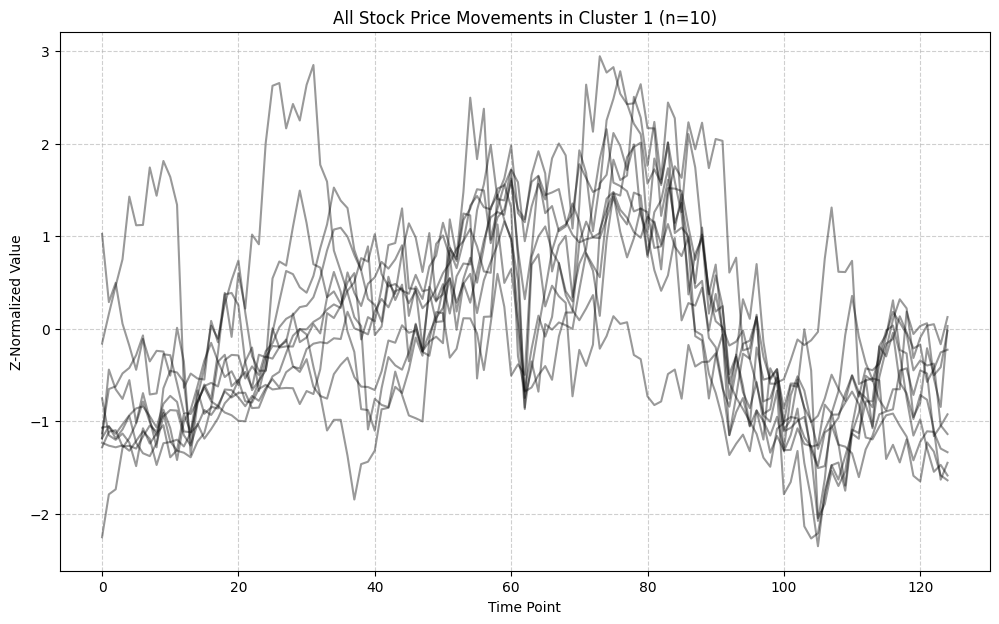

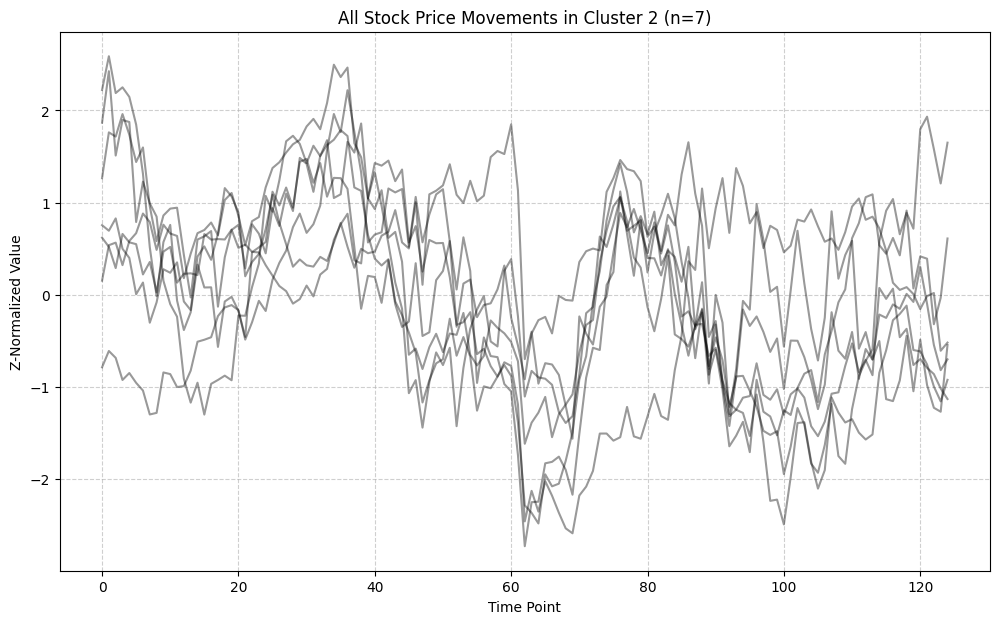

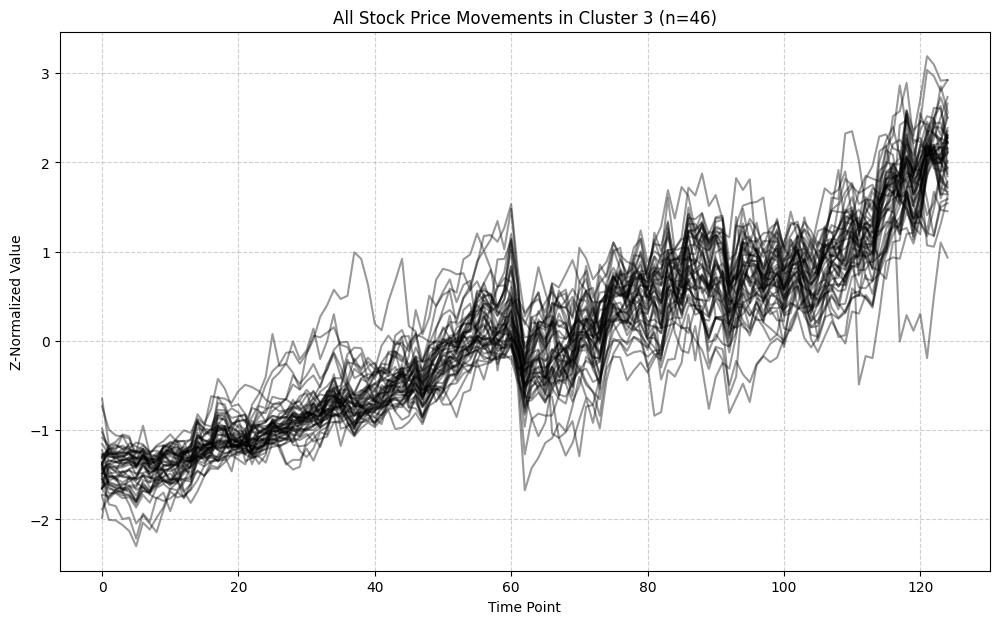

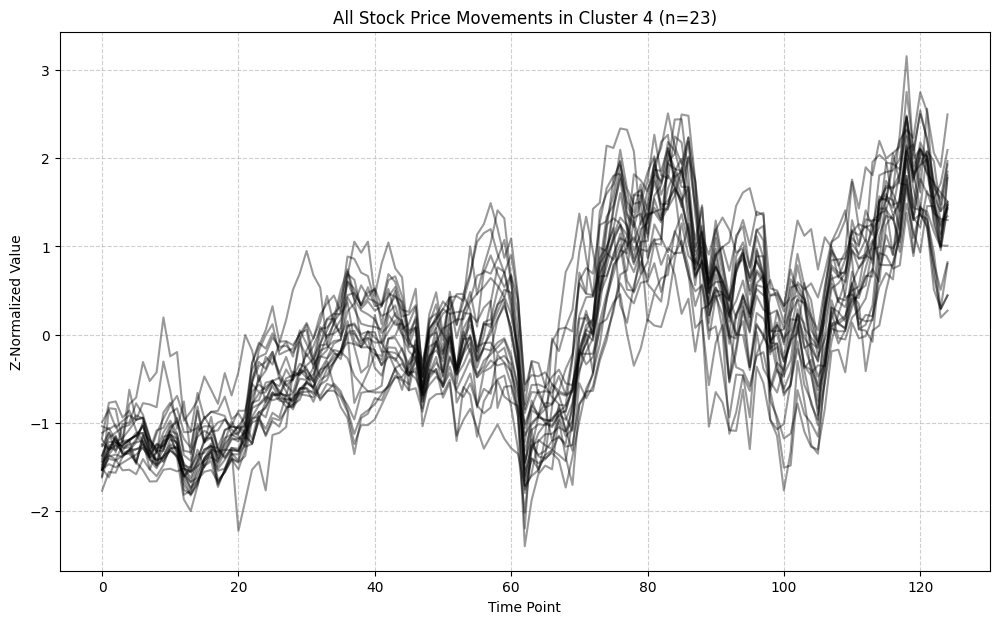

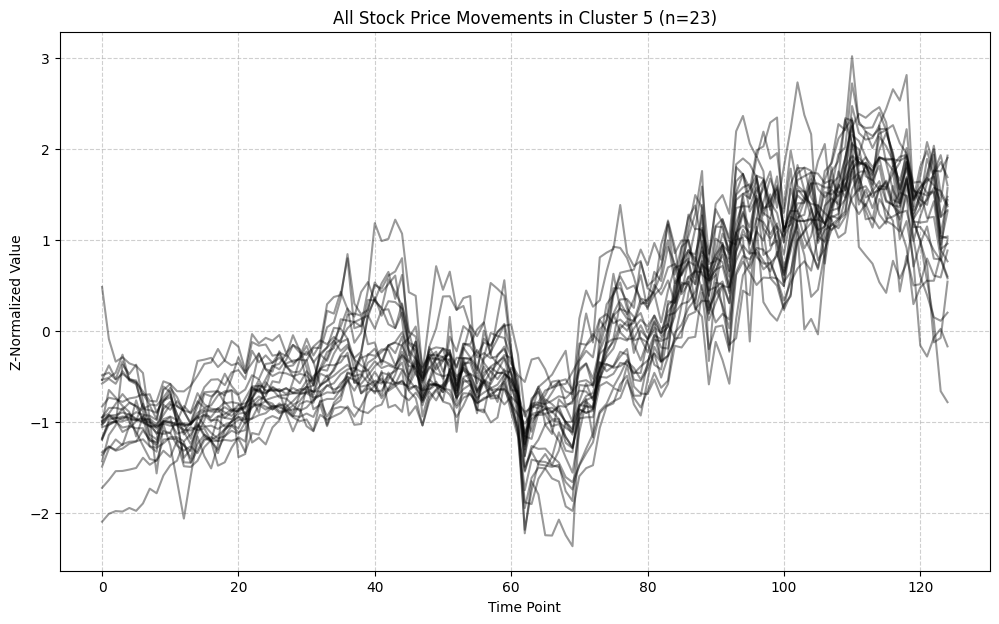

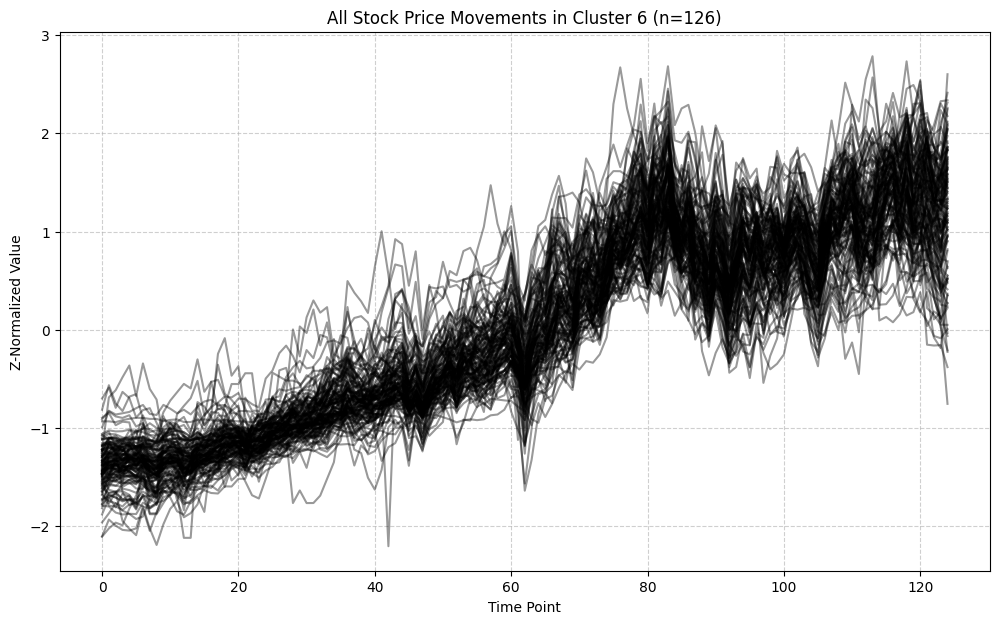

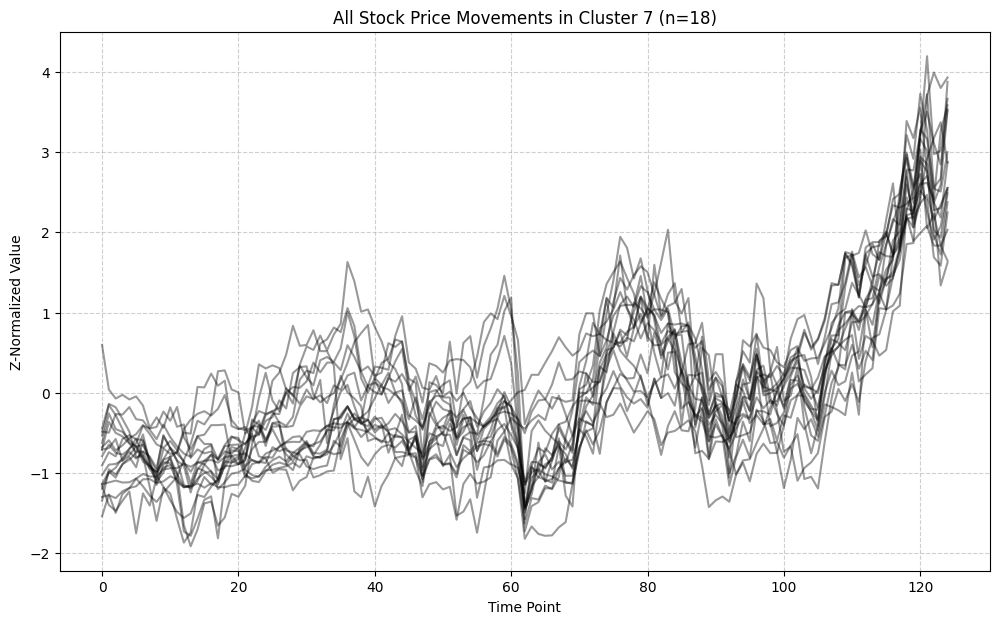

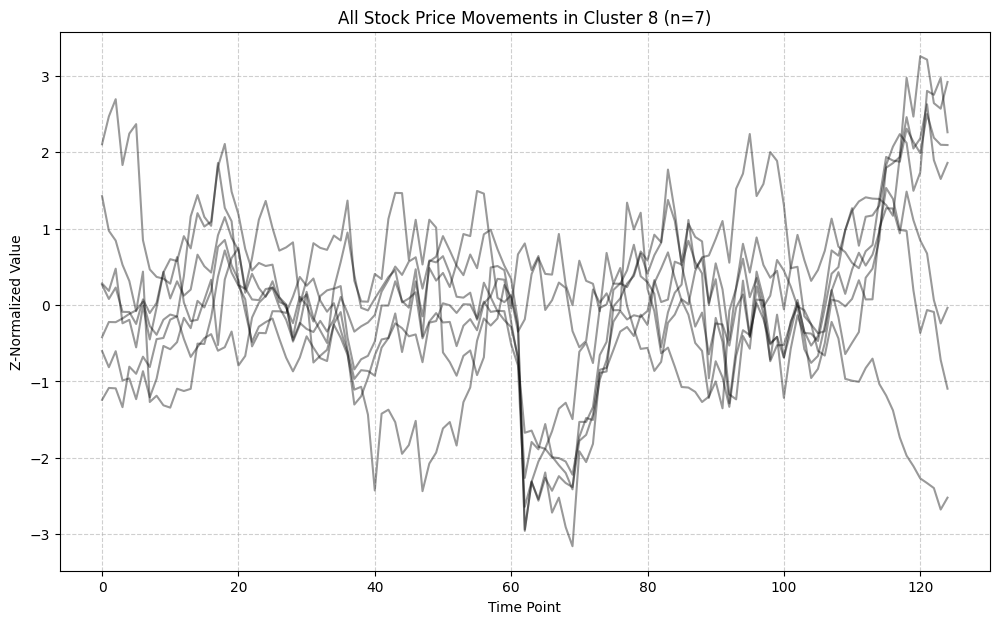

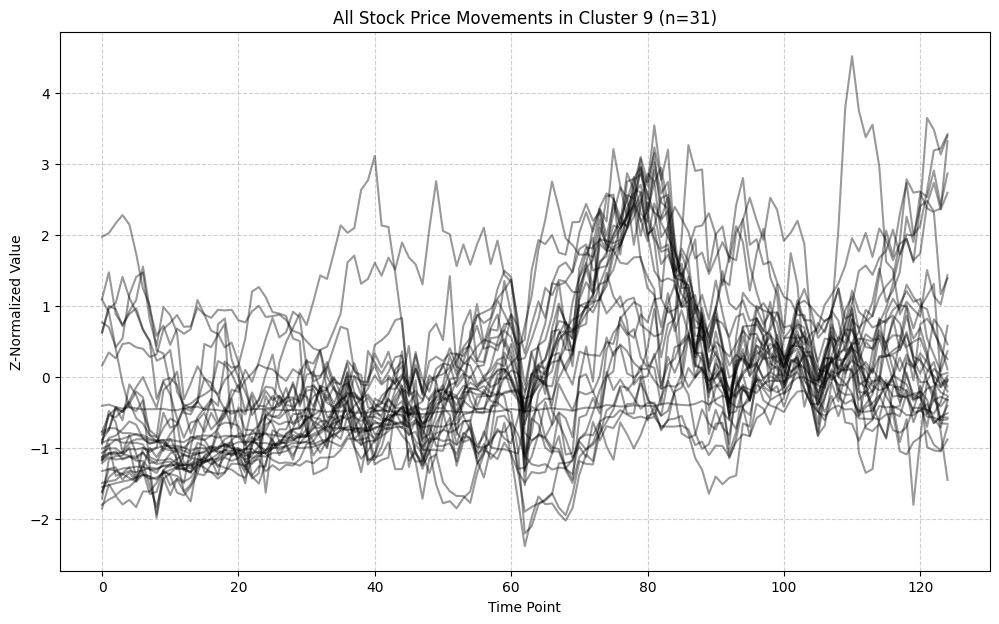

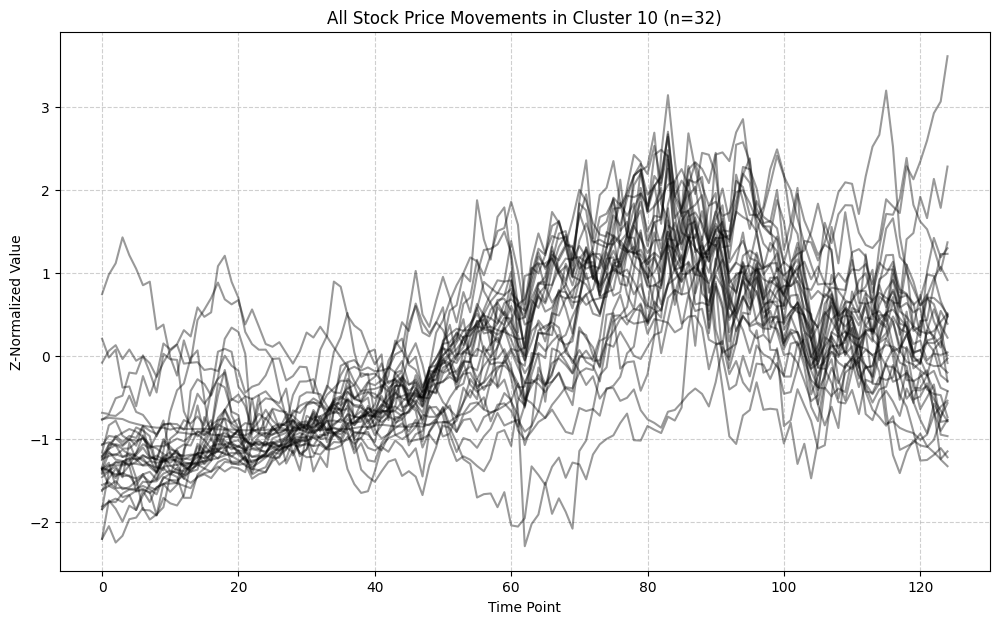

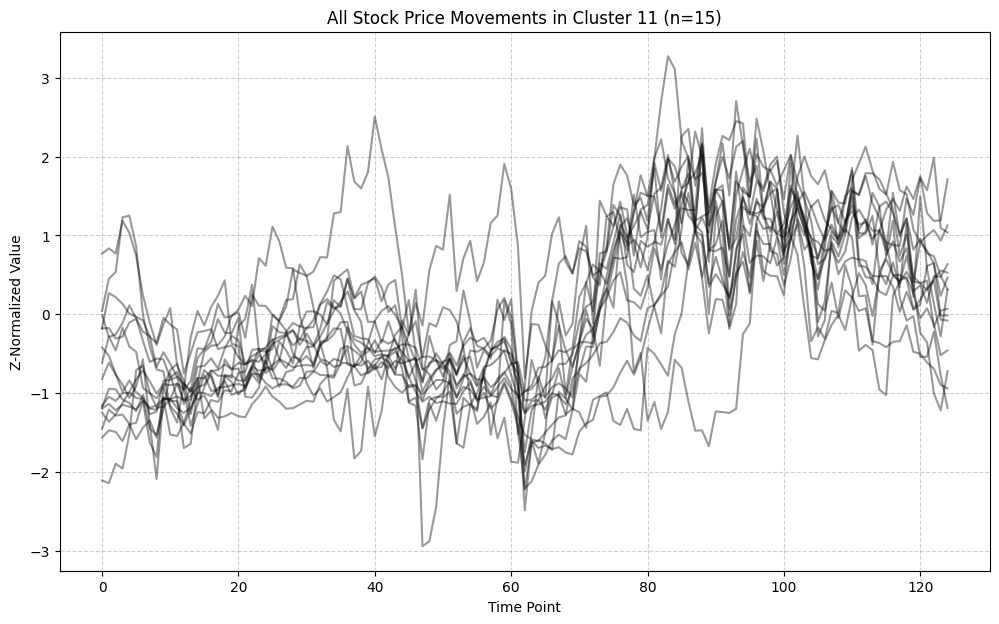

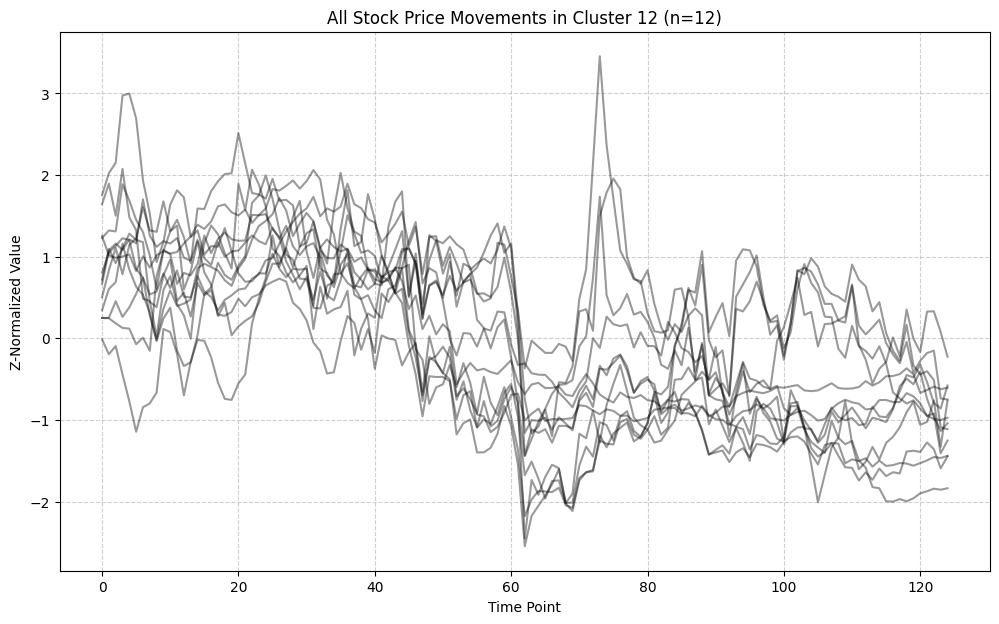

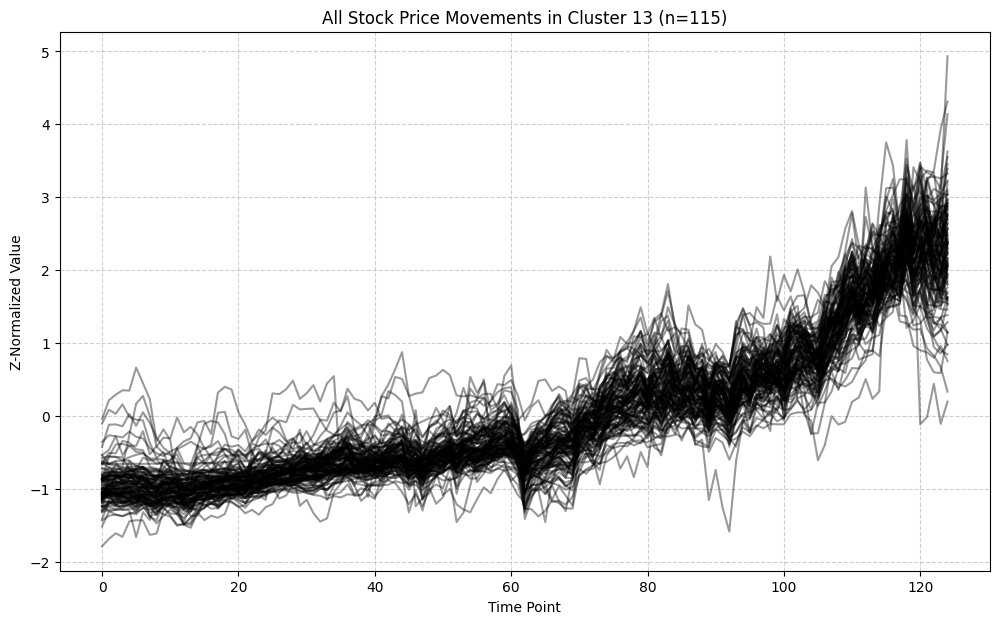

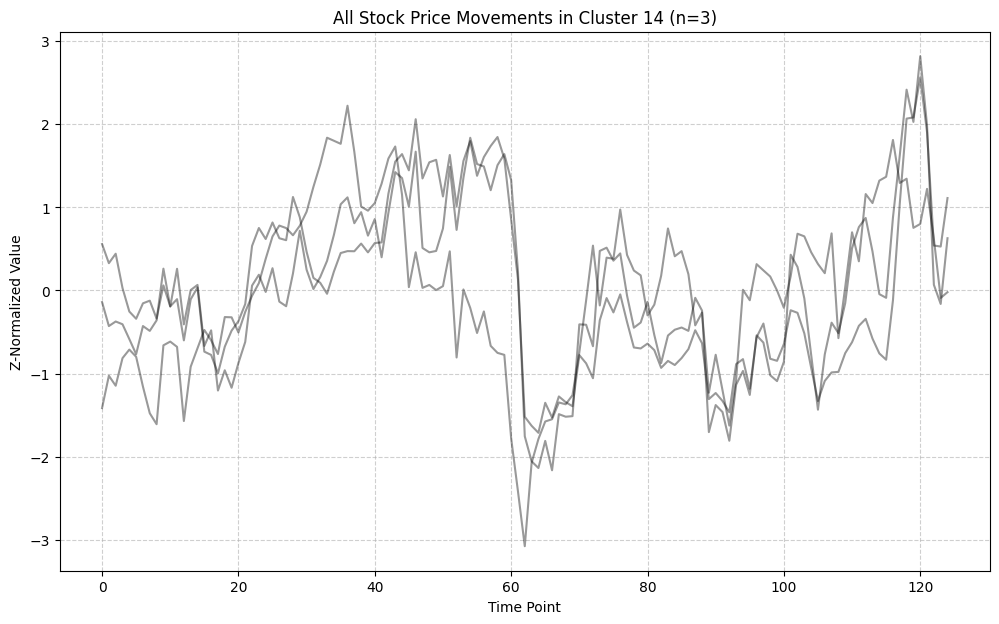

In [21]:
for i in range(1, 15):
    graph_each_cluster(i)